In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create dummy data and classifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# key metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# roc and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# f score 
from sklearn.metrics import f1_score
import seaborn as sns

data = pd.read_csv('perth_au_house_prices.csv') # load the data

data

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [3]:
data.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [4]:
#procentage of null values in "GARAGE" column
(data["GARAGE"].isna().sum()/len(data["GARAGE"]))*100

7.362728785357738

In [5]:
#procentage of null values in "BUILD_YEAR" column
(data["BUILD_YEAR"].isna().sum()/len(data["BUILD_YEAR"]))*100

9.374257190396957

In [6]:
#procentage of null values in "NEAREST_SCH_RANK" column
(data["NEAREST_SCH_RANK"].isna().sum()/len(data["NEAREST_SCH_RANK"]))*100

32.54100309008795

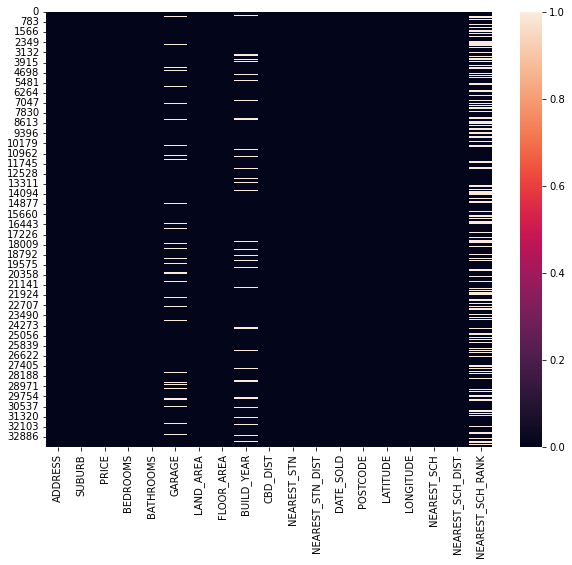

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())
plt.show()

In [8]:
data.drop(["ADDRESS", "NEAREST_SCH_RANK"], axis=1, inplace=True)

In [9]:
data['GARAGE'] = data['GARAGE'].fillna(data['GARAGE'].mean())

In [10]:
data['BUILD_YEAR'] = data['BUILD_YEAR'].fillna(data['BUILD_YEAR'].mean())

In [11]:
data.isnull().sum()

SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
dtype: int64

In [12]:
data["DATE_SOLD"] = pd.to_datetime(data["DATE_SOLD"])
data["DATE_YEAR"] = data["DATE_SOLD"].dt.year
data["DATE_MONTH"] = data["DATE_SOLD"].dt.month

<AxesSubplot:title={'center':'Build Year Frequency'}, ylabel='Frequency'>

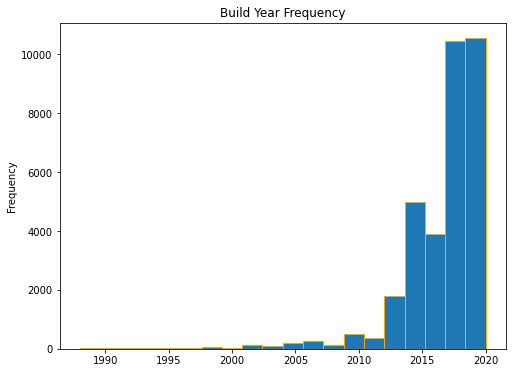

In [13]:
data["DATE_YEAR"].plot(kind="hist", edgecolor='orange', title="Build Year Frequency", figsize=(8,6), bins=20)

In [14]:
data.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,DATE_YEAR,DATE_MONTH
0,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,2018-09-01,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,2018,9
1,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,2019-02-01,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,2019,2
2,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,2015-06-01,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,2015,6
3,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,2018-07-01,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,2018,7
4,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,2016-11-01,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,2016,11


In [15]:
data.drop(["NEAREST_STN", "DATE_SOLD", "NEAREST_SCH"], axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            33656 non-null  object 
 1   PRICE             33656 non-null  int64  
 2   BEDROOMS          33656 non-null  int64  
 3   BATHROOMS         33656 non-null  int64  
 4   GARAGE            33656 non-null  float64
 5   LAND_AREA         33656 non-null  int64  
 6   FLOOR_AREA        33656 non-null  int64  
 7   BUILD_YEAR        33656 non-null  float64
 8   CBD_DIST          33656 non-null  int64  
 9   NEAREST_STN_DIST  33656 non-null  int64  
 10  POSTCODE          33656 non-null  int64  
 11  LATITUDE          33656 non-null  float64
 12  LONGITUDE         33656 non-null  float64
 13  NEAREST_SCH_DIST  33656 non-null  float64
 14  DATE_YEAR         33656 non-null  int64  
 15  DATE_MONTH        33656 non-null  int64  
dtypes: float64(5), int64(10), object(1)
memo

In [17]:
df=pd.get_dummies(data, columns=['SUBURB'],drop_first=True)
print(df)

         PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  \
0       565000         4          2     2.0        600         160   
1       365000         3          2     2.0        351         139   
2       287000         3          1     1.0        719          86   
3       255000         2          1     2.0        651          59   
4       325000         4          1     2.0        466         131   
...        ...       ...        ...     ...        ...         ...   
33651  1040000         4          3     2.0        292         245   
33652   410000         3          2     2.0        228         114   
33653   427000         3          2     2.0        261         112   
33654   295000         3          1     2.0        457          85   
33655   295000         3          1     2.0        296          95   

        BUILD_YEAR  CBD_DIST  NEAREST_STN_DIST  POSTCODE  ...  SUBURB_Wilson  \
0      2003.000000     18300              1800      6164  ...              0   

In [18]:
df = df.astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Columns: 335 entries, PRICE to SUBURB_Yokine
dtypes: int64(335)
memory usage: 86.0 MB


In [28]:
df.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,...,SUBURB_Wilson,SUBURB_Winthrop,SUBURB_Woodbridge,SUBURB_Woodlands,SUBURB_Woodvale,SUBURB_Wooroloo,SUBURB_Wungong,SUBURB_Yanchep,SUBURB_Yangebup,SUBURB_Yokine
0,565000,4,2,2,600,160,2003,18300,1800,6164,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2,351,139,2013,26900,4900,6167,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,1,719,86,1979,22600,1900,6111,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,2,651,59,1953,17900,3600,6056,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,2,466,131,1998,11200,2000,6054,...,0,0,0,0,0,0,0,0,0,0


In [31]:
corr_matrix = df.corr()
print(corr_matrix['PRICE'].sort_values(ascending=False))

PRICE                1.000000
FLOOR_AREA           0.548497
BATHROOMS            0.377133
BEDROOMS             0.252637
SUBURB_City Beach    0.195176
                       ...   
NEAREST_STN_DIST    -0.095089
LONGITUDE           -0.121327
BUILD_YEAR          -0.150108
POSTCODE            -0.171553
CBD_DIST            -0.354327
Name: PRICE, Length: 335, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [21]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
from sklearn.linear_model import LinearRegression, Ridge

lr = LinearRegression().fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print(lr_score)


0.7782436239803532


In [24]:
ridge = Ridge(alpha=15).fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
print(ridge_score)

0.7688873020989158


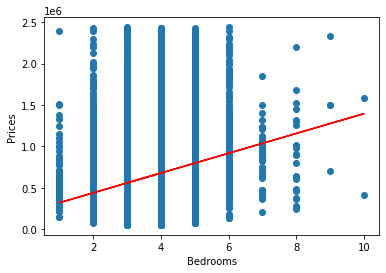

array([[677820.28728885],
       [558285.36512434],
       [558285.36512434],
       ...,
       [558285.36512434],
       [558285.36512434],
       [558285.36512434]])

In [29]:

X = df.iloc[:, 1].values.reshape(-1,1) #bedrooms
Y = df.iloc[:, 0].values.reshape(-1,1) #price

linear_regressor = LinearRegression() # create a linear regression object
linear_regressor.fit(X, Y) # perform the linear regression

Y_pred = linear_regressor.predict(X) # make the predictions based on the model

Y_pred

#plotting data and predicted variable
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Bedrooms")
plt.ylabel("Prices")
plt.show()

Y_pred

In [ ]:
X = df.iloc[:, 1].values.reshape(-1,1) #bedrooms
Y = df.iloc[:, 0].values.reshape(-1,1) #price

linear_regressor = LinearRegression() # create a linear regression object
linear_regressor.fit(X, Y) # perform the linear regression

Y_pred = linear_regressor.predict(X) # make the predictions based on the model

Y_pred

#plotting data and predicted variable
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Bedrooms")
plt.ylabel("Prices")
plt.show()

Y_pred

In [30]:
corr_matrix = df.corr()
print(corr_matrix['PRICE'].sort_values(ascending=False))

PRICE                1.000000
FLOOR_AREA           0.548497
BATHROOMS            0.377133
BEDROOMS             0.252637
SUBURB_City Beach    0.195176
                       ...   
NEAREST_STN_DIST    -0.095089
LONGITUDE           -0.121327
BUILD_YEAR          -0.150108
POSTCODE            -0.171553
CBD_DIST            -0.354327
Name: PRICE, Length: 335, dtype: float64
